In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import pickle
import numpy as np
from nnlib.nnlib.visualizations import savefig
from modules.plot_utils import plot_curve, plot_over_epochs, plot_over_n

In [4]:
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
from nnlib.nnlib.matplotlib_utils import set_default_configs
import seaborn
set_default_configs(plt, seaborn)

In [5]:
class NestedDict(dict):
    def __missing__(self, key):
        self[key] = type(self)()
        return self[key]

# MNIST 4 vs 9 (standard, deterministic, and wide network algorithms)

In [6]:
results_dir = "results"
n_seeds = 5
n_S_seeds = 30
ns = [75, 250, 1000, 4000]
epochs = np.arange(1, 11) * 20
num_classes = 2

<IPython.core.display.Javascript object>


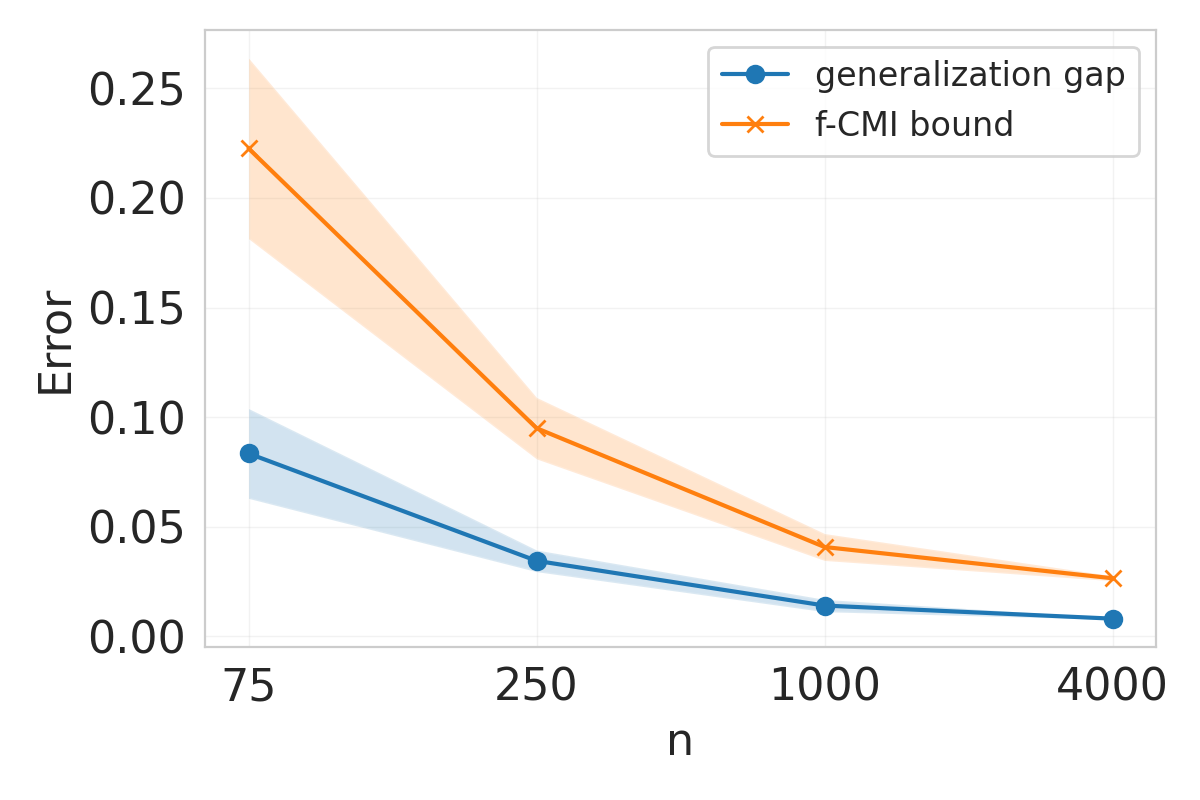

[0.08346672, 0.034506656, 0.014113342, 0.008135021]
[0.22257130242069026, 0.09499290714778866, 0.04080536081296803, 0.026547259131394413]


In [7]:
exp_name = "fcmi-mnist-4vs9-CNN-deterministic"
results_file_path = os.path.join(results_dir, exp_name, 'results.pkl')
with open(results_file_path, 'rb') as f:
    deterministic_results = pickle.load(f)

fig, ax = plot_over_n(plt, deterministic_results, ns=ns, epoch=epochs[-1])
savefig(fig, os.path.join(results_dir, exp_name, f'x=n-plot.pdf'))

<IPython.core.display.Javascript object>


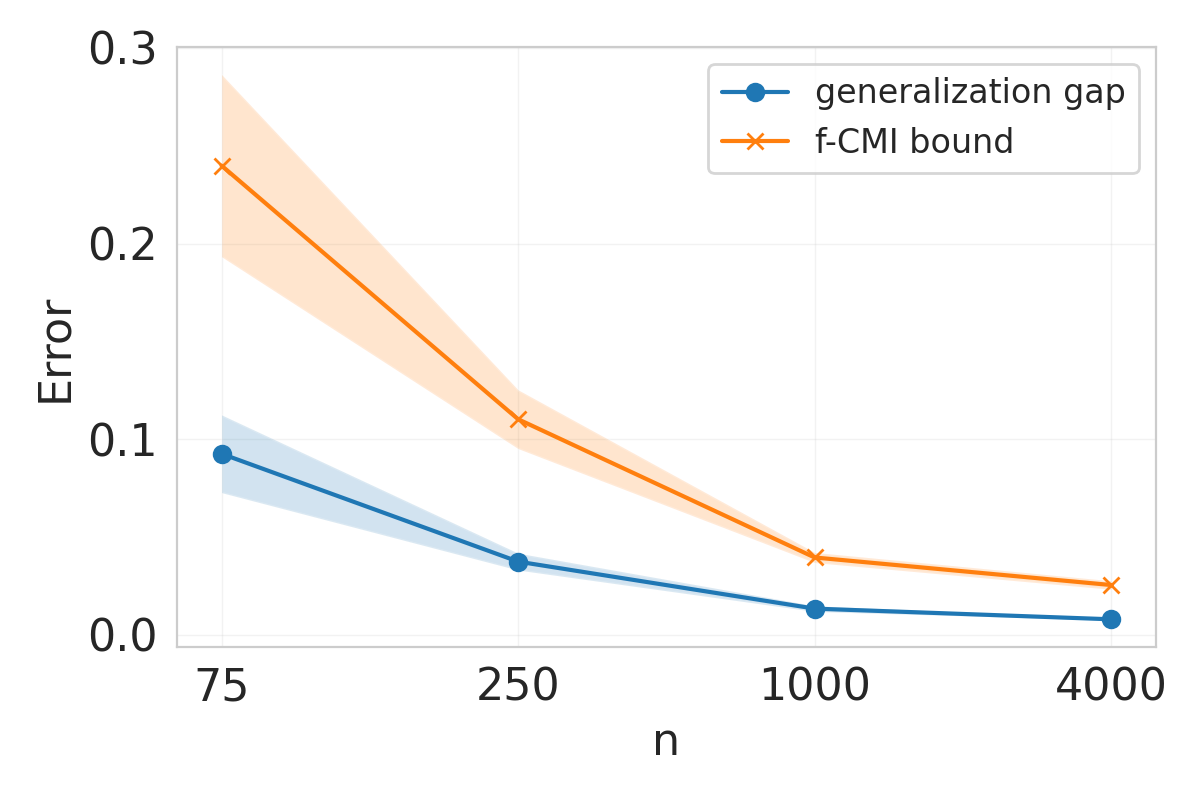

[0.09253349, 0.037386656, 0.013353324, 0.007888317]
[0.23986354081794015, 0.11018134352891047, 0.039492024793377906, 0.02540838993589608]


In [8]:
exp_name = "fcmi-mnist-4vs9-wide-CNN-deterministic"
results_file_path = os.path.join(results_dir, exp_name, 'results.pkl')
with open(results_file_path, 'rb') as f:
    wide_deterministic_results = pickle.load(f)

fig, ax = plot_over_n(plt, wide_deterministic_results, ns=ns, epoch=epochs[-1])
savefig(fig, os.path.join(results_dir, exp_name, f'x=n-plot.pdf'))

<IPython.core.display.Javascript object>


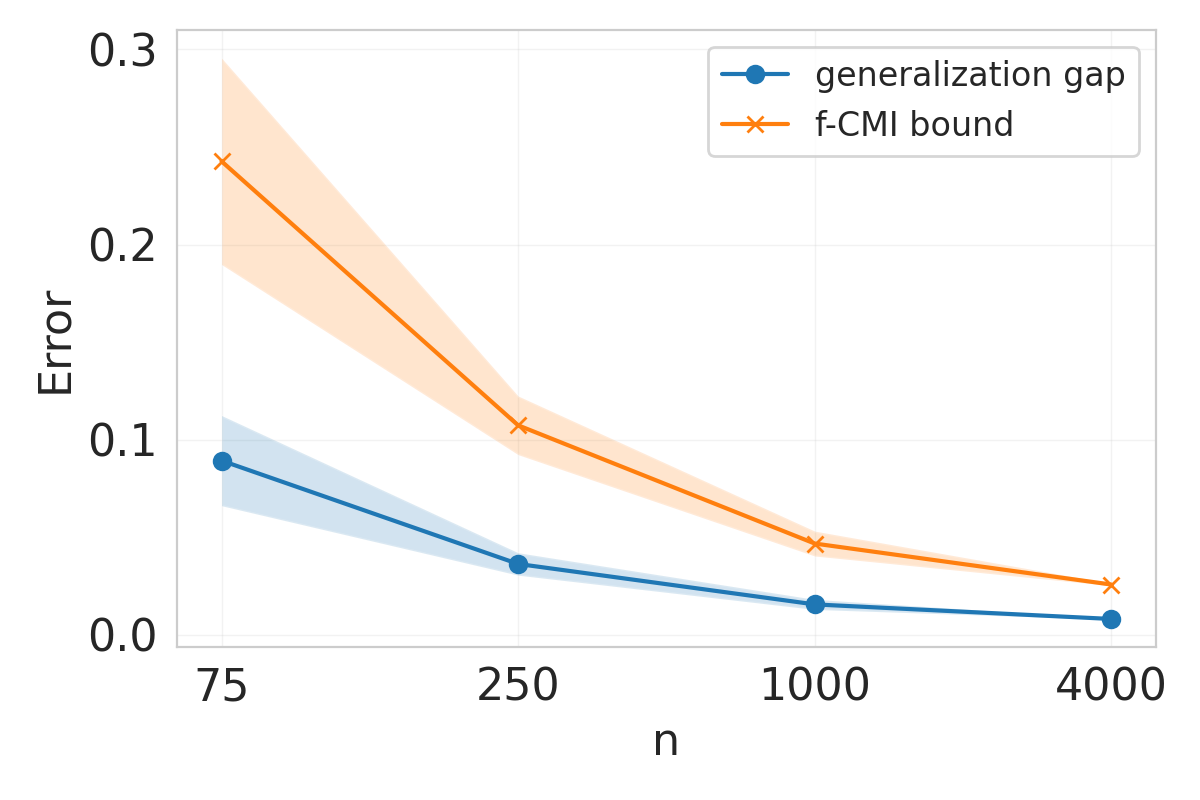

[0.08924457, 0.036266696, 0.015533352, 0.008061672]
[0.2426775367256769, 0.10732889649094401, 0.04673021958814687, 0.02571078927982424]


In [9]:
exp_name = "fcmi-mnist-4vs9-CNN"
results_file_path = os.path.join(results_dir, exp_name, 'results.pkl')
with open(results_file_path, 'rb') as f:
    standard_results = pickle.load(f)
    
fig, ax = plot_over_n(plt, standard_results, ns=ns, epoch=epochs[-1])
savefig(fig, os.path.join(results_dir, exp_name, f'x=n-plot.pdf'))

<IPython.core.display.Javascript object>


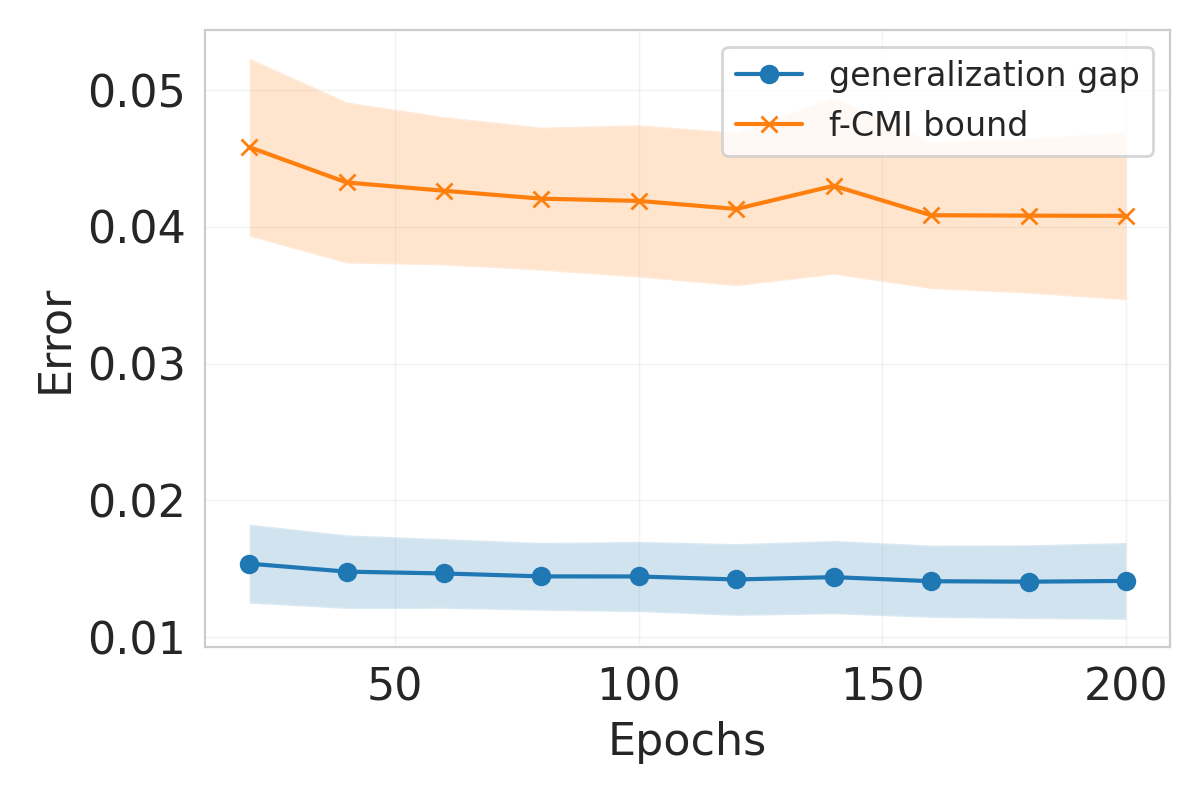

In [10]:
exp_name = "fcmi-mnist-4vs9-CNN-deterministic"
results_file_path = os.path.join(results_dir, exp_name, 'results.pkl')
with open(results_file_path, 'rb') as f:
    deterministic_results = pickle.load(f)

n=1000
fig, ax = plot_over_epochs(plt, deterministic_results, n=n, epochs=epochs)
savefig(fig, os.path.join(results_dir, exp_name, f'n={n}-x=epoch.pdf'))

# MNIST 4 vs 9 (Langevin Dynamics)

In [11]:
results_dir = "results"
exp_name = "fcmi-mnist-4vs9-CNN-LD"
n_seeds = 5
n_S_seeds = 30
n = 4000
ns = [4000]
epochs = np.arange(1, 11) * 4
num_classes = 2
batch_size = 100

In [12]:
results_file_path = os.path.join(results_dir, f'{exp_name}', 'results.pkl')
with open(results_file_path, 'rb') as f:
    fcmi_results = pickle.load(f)
    
results_file_path = os.path.join(results_dir, f'{exp_name}', 'sgld_results.pkl')
with open(results_file_path, 'rb') as f:
    sgld_results = pickle.load(f)

<IPython.core.display.Javascript object>


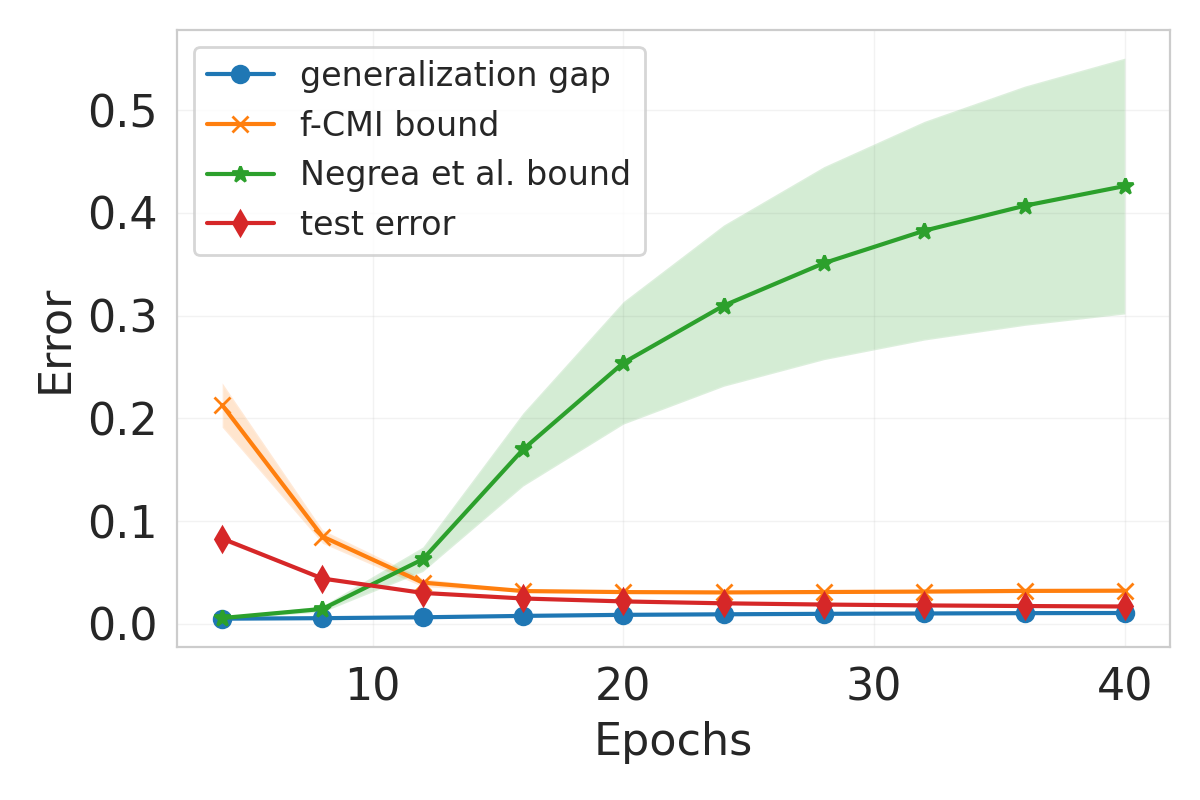

In [13]:
fig, ax = plot_over_epochs(plt, fcmi_results, n=ns[0], epochs=epochs)

sgld_means = []
sgld_stds = []

test_means = []
test_stds = []

for epoch in epochs:
    sgld_mean = np.nanmean([d['sgld_bound'] for d in sgld_results[n][epoch]])
    sgld_std = np.nanstd([d['sgld_bound'] for d in sgld_results[n][epoch]])
    sgld_means.append(sgld_mean)
    sgld_stds.append(sgld_std)

    test_mean = 1.0 - np.nanmean([d['exp_val_acc'] for d in fcmi_results[n][epoch]])
    test_std = np.nanstd([d['exp_val_acc'] for d in fcmi_results[n][epoch]])
    test_means.append(test_mean)
    test_stds.append(test_std)
    
plot_curve(plt, ax, epochs, sgld_means, sgld_stds, label=f'Negrea et al. bound', marker='*')
plot_curve(plt, ax, epochs, test_means, test_stds, label='test error', marker='d')

# ax.set_yscale('log')
ax.legend()
ax.set_yticks(np.linspace(0.0, 0.5, 6))
fig.tight_layout()
savefig(fig, os.path.join(results_dir, exp_name, f'main-plot-n={n}-x=epochs.pdf'))

# Cifar-10 pretrained ResNet-50

In [14]:
results_dir = "results"
exp_name = "cifar10-pretrained-resnet50"
n_seeds = 1
n_S_seeds = 40
ns = [1000, 5000, 20000]
epochs = [40]
num_classes = 10
batch_size = 64

<IPython.core.display.Javascript object>


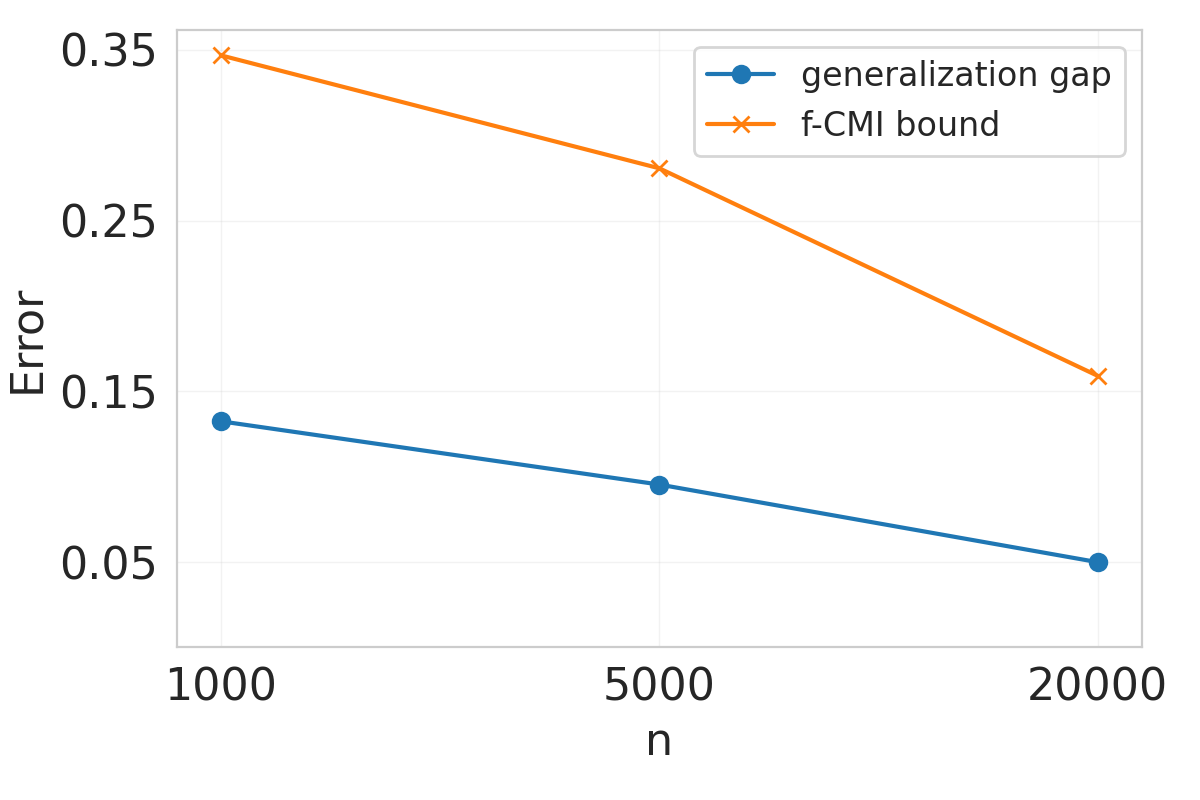

[0.13247502, 0.0954299, 0.04993701]
[0.3468594423854978, 0.28067227320152904, 0.15908099258745131]


In [15]:
results_file_path = os.path.join(results_dir, f'{exp_name}', 'results.pkl')
with open(results_file_path, 'rb') as f:
    fcmi_results = pickle.load(f)

fig, ax = plot_over_n(plt, fcmi_results, ns=ns, epoch=epochs[-1])
ax.set_yticks(np.linspace(0.05, 0.35, 4))
ax.set_ylim(bottom=0.0)
savefig(fig, os.path.join(results_dir, exp_name, f'x=n-plot.pdf'))

# ResNet-50 CIFAR-10 Langevin Dynamics

In [16]:
results_dir = "results"
exp_name = "cifar10-pretrained-resnet50-LD"
n_seeds = 1
n_S_seeds = 20  # could be 40
ns = [20000]
epochs = np.arange(1, 9) * 2
num_classes = 10
batch_size = 64

In [17]:
results_file_path = os.path.join(results_dir, f'{exp_name}', 'results.pkl')
with open(results_file_path, 'rb') as f:
    fcmi_results = pickle.load(f)
    
results_file_path = os.path.join(results_dir, f'{exp_name}', 'sgld_results.pkl')
with open(results_file_path, 'rb') as f:
    sgld_results = pickle.load(f)

<IPython.core.display.Javascript object>


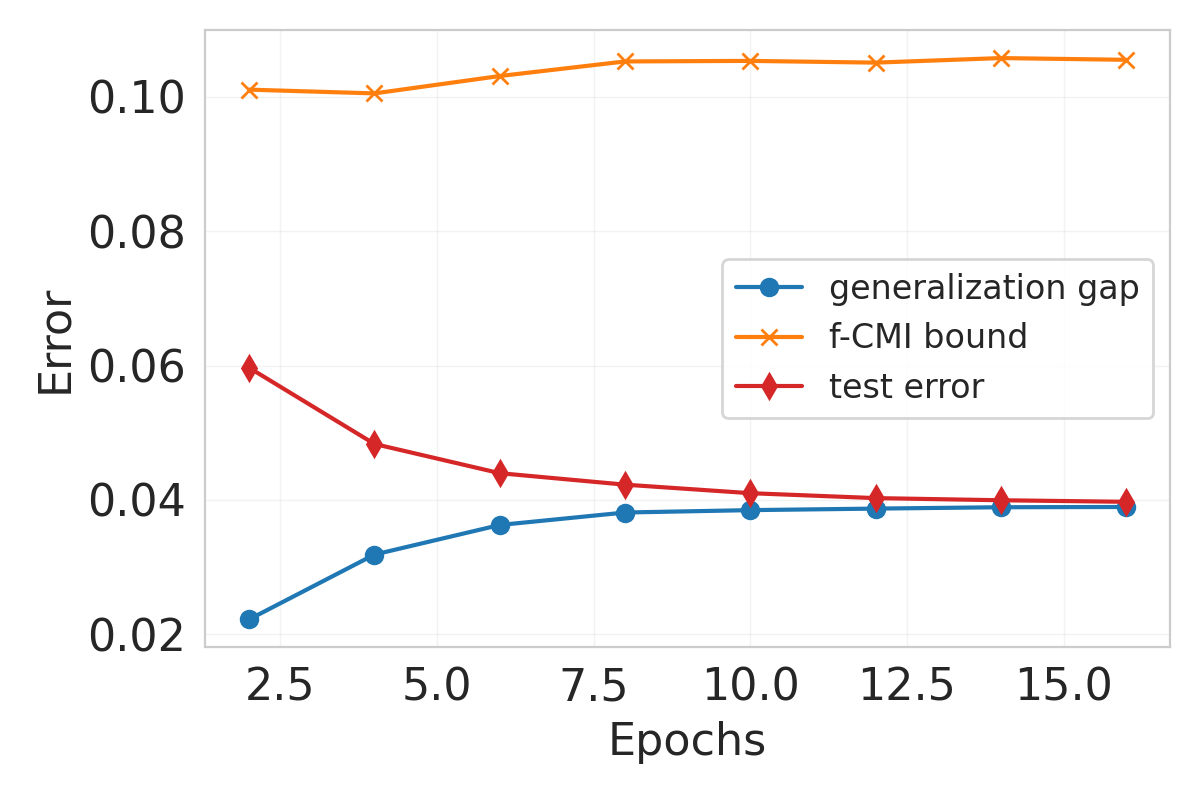

In [18]:
n = ns[0]  # 20000
fig, ax = plot_over_epochs(plt, fcmi_results, n=ns[0], epochs=epochs)

sgld_means = []
sgld_stds = []

test_means = []
test_stds = []

for epoch in epochs:
    sgld_mean = np.nanmean([d['sgld_bound'] for d in sgld_results[n][epoch]])
    sgld_std = np.nanstd([d['sgld_bound'] for d in sgld_results[n][epoch]])
    sgld_means.append(sgld_mean)
    sgld_stds.append(sgld_std)

    test_mean = 1.0 - np.nanmean([d['exp_val_acc'] for d in fcmi_results[n][epoch]])
    test_std = np.nanstd([d['exp_val_acc'] for d in fcmi_results[n][epoch]])
    test_means.append(test_mean)
    test_stds.append(test_std)
    
# plot_curve(ax, epochs, sgld_means, sgld_stds, label=f'Negrea et al. bound', marker='*')
ax.plot([],[])
plot_curve(plt, ax, epochs, test_means, test_stds, label='test error', marker='d')

# ax.set_yscale('log')
ax.legend()
# ax.set_yticks(np.linspace(0.0, 0.5, 6))
fig.tight_layout()
savefig(fig, os.path.join(results_dir, exp_name, f'main-plot-n={n}-x=epochs-wno-SGLD.pdf'))